# Projektarbeit Gruppe 2: Gesundheitsdaten

https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

In [2]:
# Import der benötigten Bibliotheken

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Anforderungen 4

Feature Engineering & Zeitreihen

In [3]:
# Lokaler Repository Pfad auslesen zum dynamischen Laden unabhängig des Nutzers:
path = str(os.getcwd()).replace("\Projektarbeit\Aufgaben", "")

# Lesen der CSV Datei:
dataset = pd.read_csv(path + '\smoking_drinking_dataset_V0.csv')

# Umbenennen der Spalten:

dataset = dataset.rename(columns={'sex': 'Geschlecht', 'age': 'Alter', 'height': 'Größe', 'weight': 'Gewicht', 'waistline': 'Hüftumfang', 'sight_left': 'Sehkraft_links', 'sight_right': 'Sehkraft_rechts', 'hear_left': 'Hörkraft_links', 'hear_right': 'Hörkraft_rechts', 'SBP': 'Systolischer Blutdruck', 'DBP': 'Diastolischer Blutdruck', 'BLDS': 'Blutleckdetektor', 'tot_chole': 'Totale Cholesterin', 'HDL_chole': 'HDL_Cholesterin', 'LDL_chole': 'LDL_Cholesterin', 'triglyceride': 'Triglycerid', 'hemoglobin': 'Hemoglobin', 'urine_protein': 'Urin_Proteine', 'serum_creatinine': 'Serum_Kreatinin', 'SGOT_AST': 'SGOT_AST', 'SGOT_ALT': 'SGOT_ALT', 'gamma_GTP': 'gamma_GTP', 'SMK_stat_type_cd': 'Raucher_Status', 'DRK_YN': 'Trinker'})

dataset.head()

,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,...,LDL_Cholesterin,Triglycerid,Hemoglobin,Urin_Proteine,Serum_Kreatinin,SGOT_AST,SGOT_ALT,gamma_GTP,Raucher_Status,Trinker
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


# Erstellen 2 neuer Features:

In [4]:
# Hinzufügen Feature 1 (Body-Mass-Index):

body_mass_index = dataset["Gewicht"].astype(np.float64) / ((dataset["Größe"].astype(np.float64) / 100) * (dataset["Größe"].astype(np.float64) / 100))

dataset["Body-Mass-Index"] = round(body_mass_index, 3)

# Hinzufügen Feature 2 (Puls):

MAD = dataset["Diastolischer Blutdruck"] + (( dataset["Systolischer Blutdruck"] - dataset["Diastolischer Blutdruck"] ) * 0.5)

dataset["Mittlerer arterieller Blutdruck"] = MAD

dataset.head()

,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,...,Hemoglobin,Urin_Proteine,Serum_Kreatinin,SGOT_AST,SGOT_ALT,gamma_GTP,Raucher_Status,Trinker,Body-Mass-Index,Mittlerer arterieller Blutdruck
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y,25.952,100.0
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N,24.691,106.0
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N,27.548,95.0
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N,26.122,116.0
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N,22.039,110.0


In [5]:
dataset["Mittlerer arterieller Blutdruck"].describe()

count    991346.000000
mean         99.242563
std          11.428969
min          49.500000
25%          91.000000
50%          99.000000
75%         106.000000
max         212.500000
Name: Mittlerer arterieller Blutdruck, dtype: float64

# Feature Engineering:
One Hot Encoding --> Einordung des Blutdrucks nach WHO
https://www.veroval.info/de-de/wissen/Blutdruck/wissenswertes-ueber-bluthochdruck

Laut WHO und anderer führender Gesundheitsorganisationen werden die systolischen und diastolischen Blutdruckwerte in sechs Kategorien1 unterteilt: optimal (bis zu 119 mmHg systolisch und bis zu 79 mmHg diastolisch), 
normal (120-129 mmHg systolisch und/oder 80-84 mmHg diastolisch), 
Grenzwert normal (130-139 mmHg systolisch und/oder 85-89 mmHg diastolisch), 
Hypertonie Grad 1 (140-159 mmHg systolisch und/oder 90-99 mmHg diastolisch), 
Hypertonie Grad 2 (160-179 mmHg systolisch und/oder 100-109 mmHg diastolisch) und 
Hypertonie Grad 3 (> 180 mmHg systolisch und/oder > 110 mmHg diastolisch).

In [6]:
dataset["BD_optimal"] = dataset['Systolischer Blutdruck']
dataset["BD_normal"] = dataset['Systolischer Blutdruck']
dataset["BD_Grenzwert_normal"] = dataset['Systolischer Blutdruck']
dataset["BD_Hypertonie Grad 1"] = dataset['Systolischer Blutdruck']
dataset["BD_Hypertonie Grad 2"] = dataset['Systolischer Blutdruck']
dataset["BD_Hypertonie Grad 3"] = dataset['Systolischer Blutdruck']



In [7]:
dataset["BD_optimal"] = (dataset['Systolischer Blutdruck'] <= 119) & (dataset['Diastolischer Blutdruck'] <= 79)
dataset["BD_optimal"] = dataset["BD_optimal"].astype(int)

In [8]:
dataset["BD_normal"] = (dataset['Systolischer Blutdruck'] >= 120) & (dataset['Systolischer Blutdruck'] < 130) & (dataset['Diastolischer Blutdruck'] >= 80) & (dataset['Diastolischer Blutdruck'] < 85)
dataset["BD_normal"] = dataset["BD_normal"].astype(int) 

dataset["BD_Grenzwert_normal"] = (dataset['Systolischer Blutdruck'] >= 130) & (dataset['Systolischer Blutdruck'] < 140) & (dataset['Diastolischer Blutdruck'] >= 85) & (dataset['Diastolischer Blutdruck'] < 90)
dataset["BD_Grenzwert_normal"] = dataset["BD_Grenzwert_normal"].astype(int) 

dataset["BD_Hypertonie Grad 1"] = (dataset['Systolischer Blutdruck'] >= 140) & (dataset['Systolischer Blutdruck'] < 160) & (dataset['Diastolischer Blutdruck'] >= 90) & (dataset['Diastolischer Blutdruck'] < 100)
dataset["BD_Hypertonie Grad 1"] = dataset["BD_Hypertonie Grad 1"].astype(int) 

dataset["BD_Hypertonie Grad 2"] = (dataset['Systolischer Blutdruck'] >= 160) & (dataset['Systolischer Blutdruck'] < 180) & (dataset['Diastolischer Blutdruck'] >= 100) & (dataset['Diastolischer Blutdruck'] < 110)
dataset["BD_Hypertonie Grad 2"] = dataset["BD_Hypertonie Grad 2"].astype(int) 

dataset["BD_Hypertonie Grad 3"] = (dataset['Systolischer Blutdruck'] >= 180) & (dataset['Diastolischer Blutdruck'] >= 110)
dataset["BD_Hypertonie Grad 3"] = dataset["BD_Hypertonie Grad 3"].astype(int) 

In [9]:
dataset['Trinker'] = dataset['Trinker'] == 'Y'
dataset['Trinker'] = dataset['Trinker'].astype(int)

dataset.head()

,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,...,Raucher_Status,Trinker,Body-Mass-Index,Mittlerer arterieller Blutdruck,BD_optimal,BD_normal,BD_Grenzwert_normal,BD_Hypertonie Grad 1,BD_Hypertonie Grad 2,BD_Hypertonie Grad 3
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,1.0,1,25.952,100.0,0,1,0,0,0,0
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,3.0,0,24.691,106.0,0,0,0,0,0,0
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,1.0,0,27.548,95.0,0,0,0,0,0,0
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,1.0,0,26.122,116.0,0,0,0,0,0,0
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,1.0,0,22.039,110.0,0,0,0,0,0,0


In [10]:
dataset['Male'] = dataset['Geschlecht'] == 'Male'
dataset['Female'] = dataset['Geschlecht'] == 'Female'
dataset.head()

,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,...,Body-Mass-Index,Mittlerer arterieller Blutdruck,BD_optimal,BD_normal,BD_Grenzwert_normal,BD_Hypertonie Grad 1,BD_Hypertonie Grad 2,BD_Hypertonie Grad 3,Male,Female
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,25.952,100.0,0,1,0,0,0,0,True,False
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,24.691,106.0,0,0,0,0,0,0,True,False
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,27.548,95.0,0,0,0,0,0,0,True,False
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,26.122,116.0,0,0,0,0,0,0,True,False
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,22.039,110.0,0,0,0,0,0,0,True,False


In [11]:
dataset['Male'] = dataset['Male'].astype(int)
dataset['Female'] = dataset['Female'].astype(int)
dataset['Trinker'] = dataset['Trinker'].astype(int)

In [12]:
dataset = dataset.drop('Geschlecht', axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Alter                            991346 non-null  int64  
 1   Größe                            991346 non-null  int64  
 2   Gewicht                          991346 non-null  int64  
 3   Hüftumfang                       991346 non-null  float64
 4   Sehkraft_links                   991346 non-null  float64
 5   Sehkraft_rechts                  991346 non-null  float64
 6   Hörkraft_links                   991346 non-null  float64
 7   Hörkraft_rechts                  991346 non-null  float64
 8   Systolischer Blutdruck           991346 non-null  float64
 9   Diastolischer Blutdruck          991346 non-null  float64
 10  Blutleckdetektor                 991346 non-null  float64
 11  Totale Cholesterin               991346 non-null  float64
 12  HD

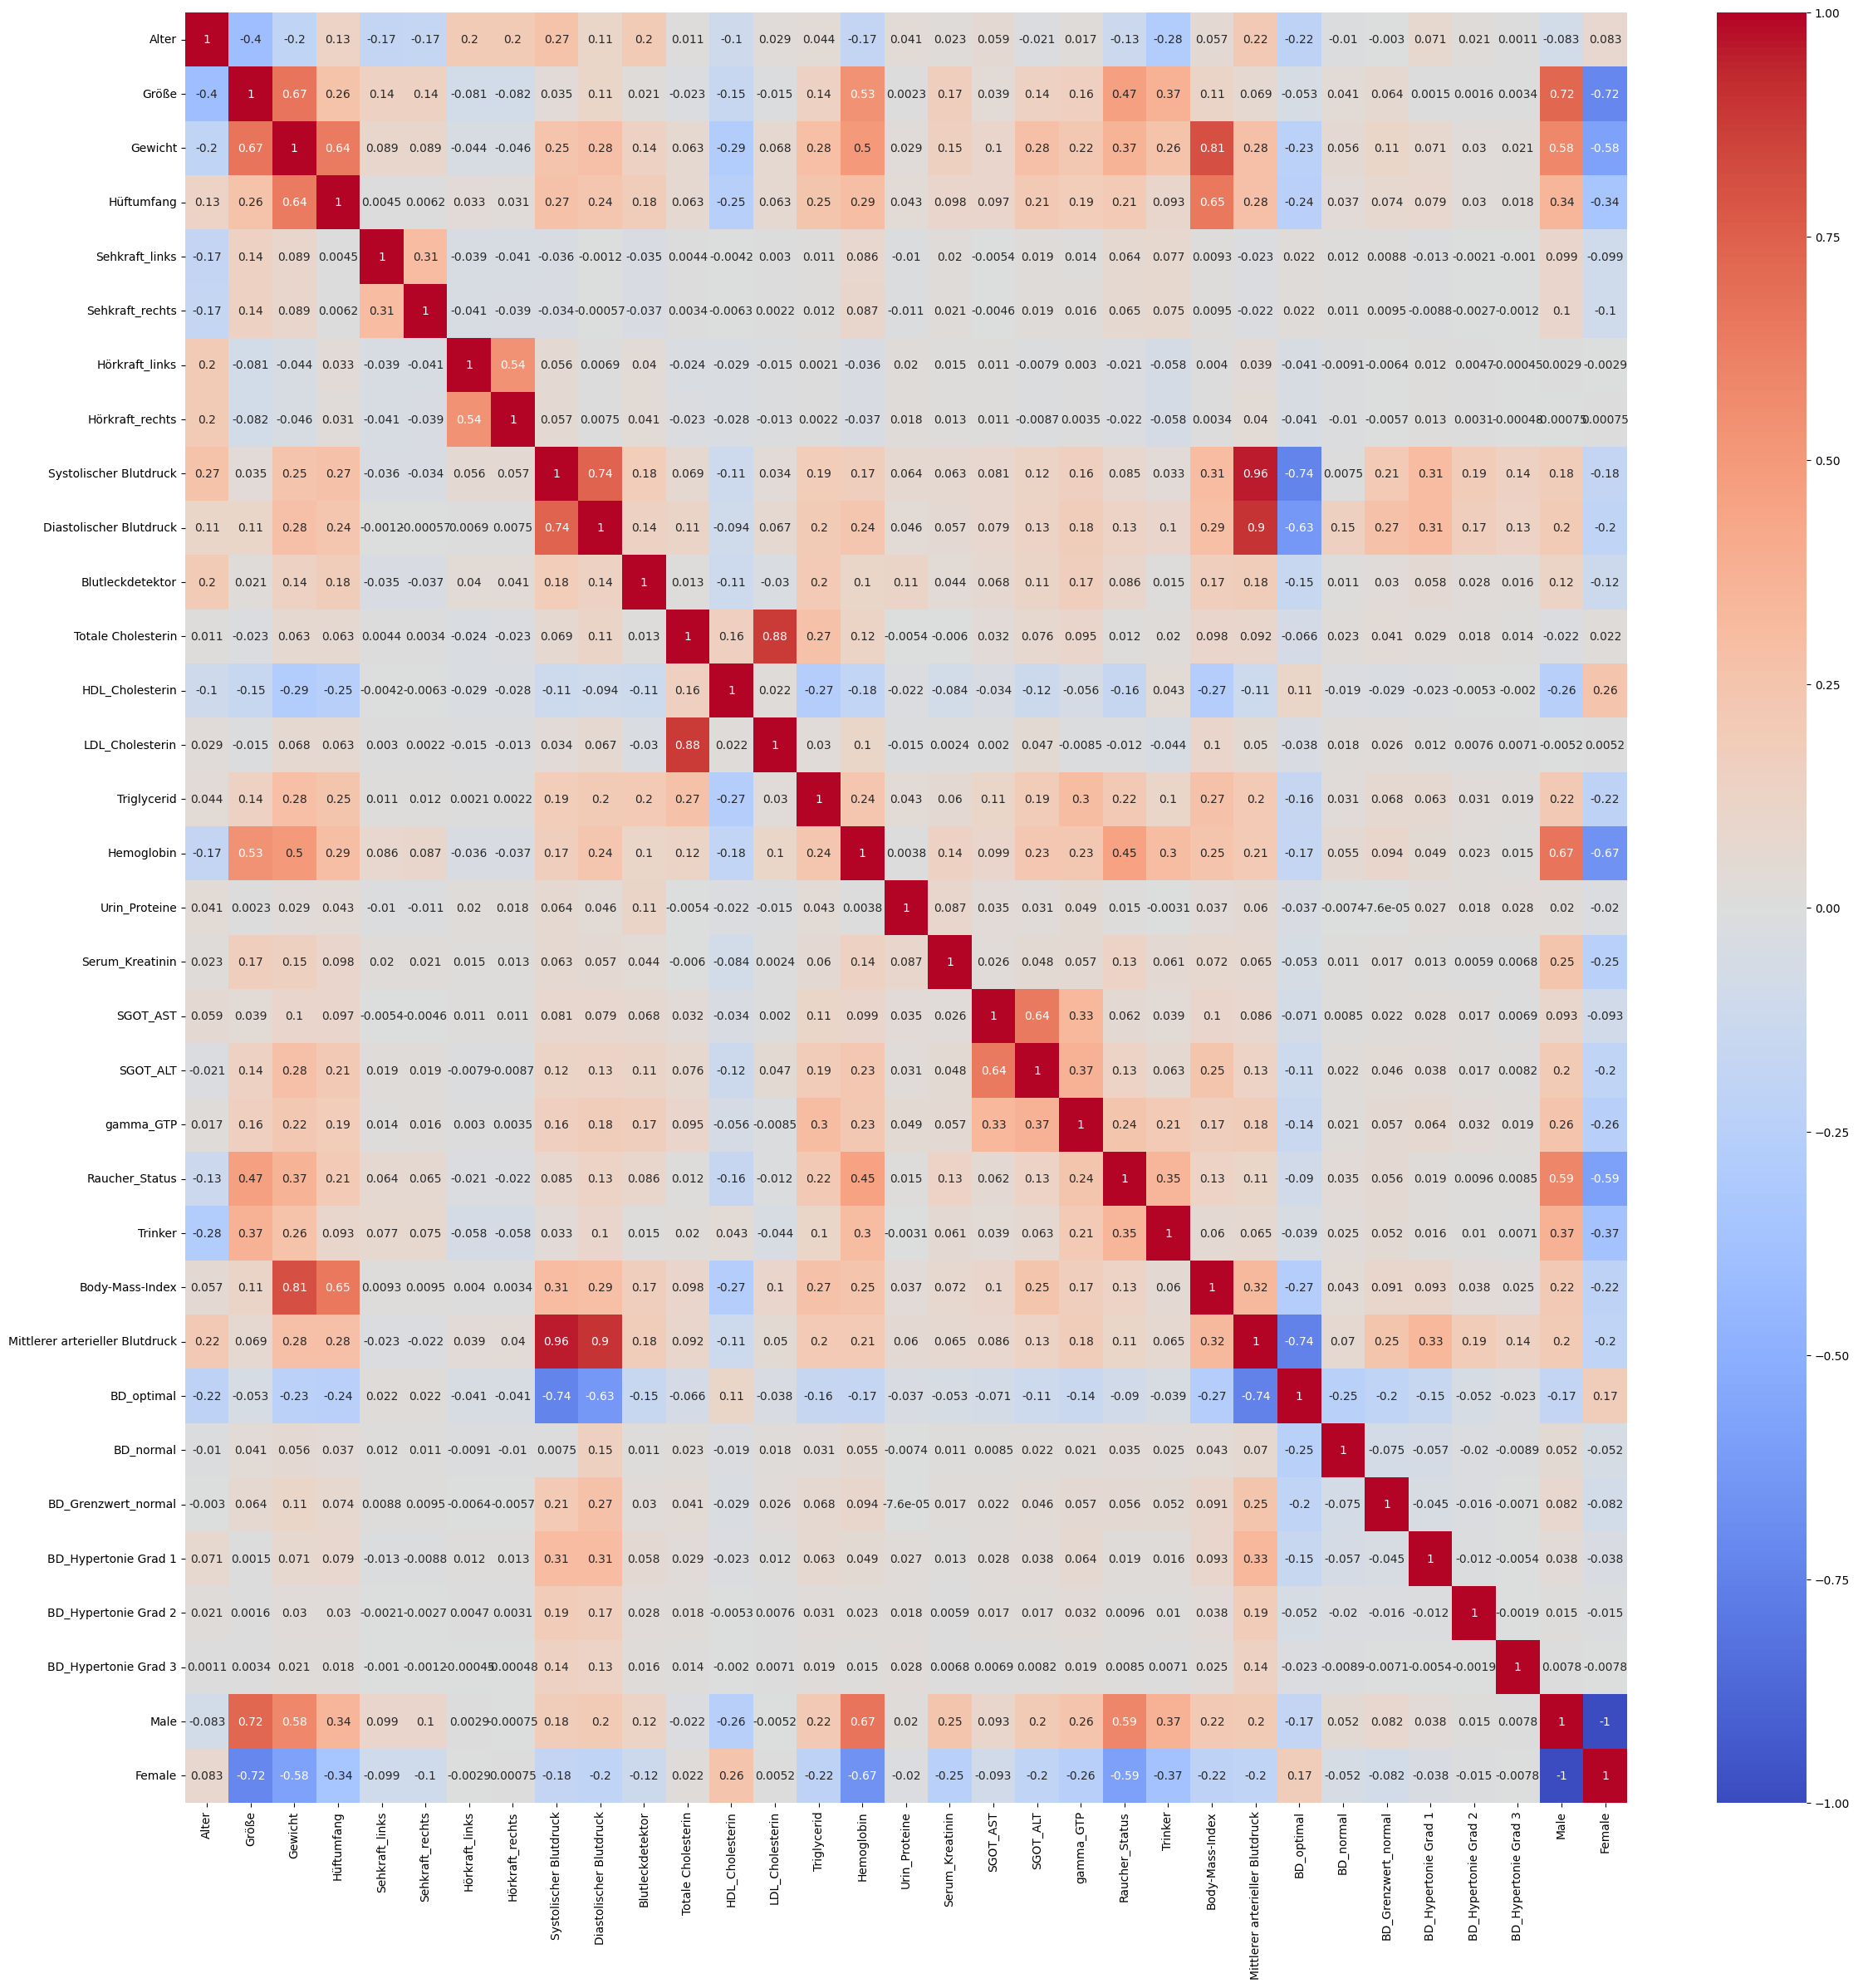

In [13]:
# Untersuchung der Korrelation:

plt.figure(figsize=(28, 28))
heatmap = sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")

plt.show()

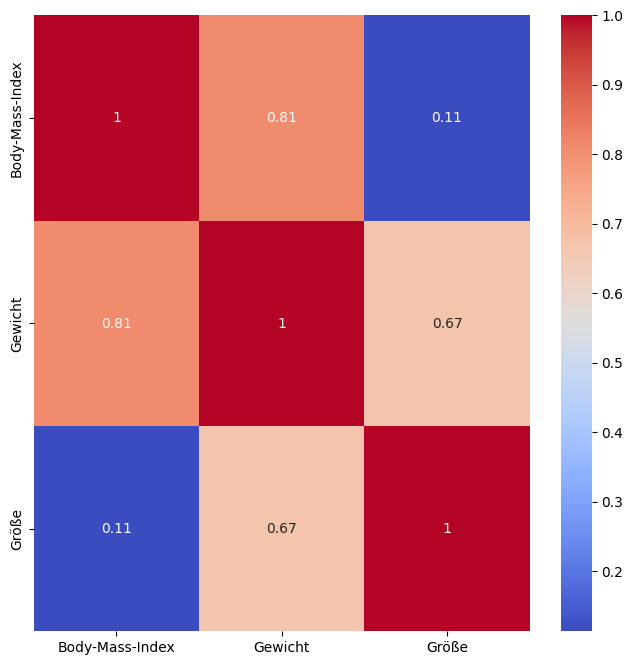

In [14]:
# Untersuchung der Korrelation mit weniger Features:

plt.figure(figsize=(8, 8))
dataset1 = dataset[['Body-Mass-Index', 'Gewicht', 'Größe']]
heatmap = sns.heatmap(dataset1.corr(), annot=True, cmap="coolwarm")

plt.show()

- Das Gewicht und der BMI korrelieren
- Das Gewicht und die Größe korrelieren ebenso, aber schwächer
- ...

# Zeitreihe erstellen

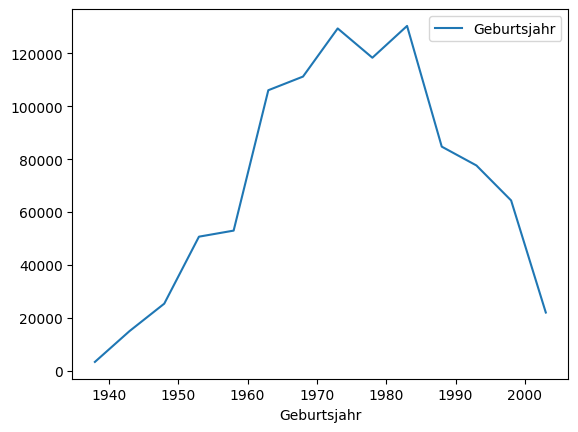

In [15]:
dataset['Geburtsjahr'] = 2023 - dataset['Alter']

years = dataset.groupby('Geburtsjahr').agg({'Geburtsjahr':'count'})

years.plot()
plt.show()

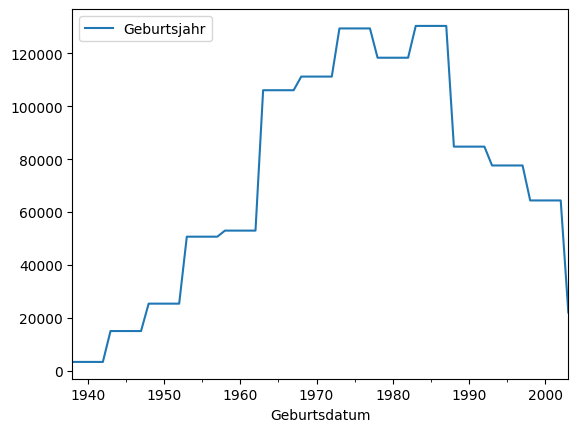

In [36]:
dataset['Geburtstag'] = '0101'
dataset['Geburtsdatum'] = dataset['Geburtsjahr'].astype(str) + dataset['Geburtstag']

dataset['Geburtsdatum'] = pd.to_datetime(dataset['Geburtsdatum'], format = '%Y%m%d')

years = dataset.groupby('Geburtsdatum').agg({'Geburtsjahr': 'count'})

years.resample('Y').ffill().plot()
plt.show()

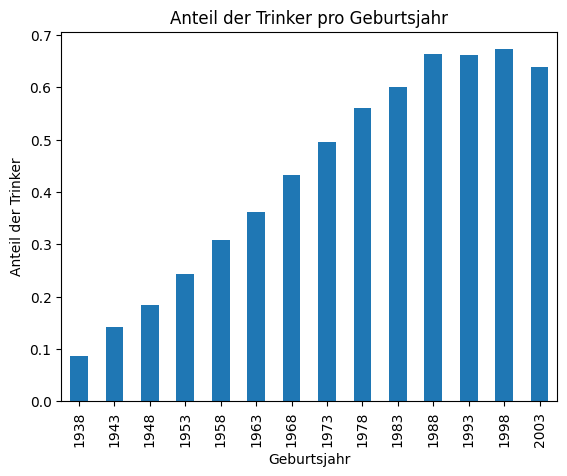

In [17]:
grouped = dataset.groupby('Geburtsjahr')['Trinker'].sum()

# Zählen Sie die Gesamtanzahl pro Geburtsjahr
total_by_year = dataset['Geburtsjahr'].value_counts()

# Berechnen Sie den Anteil der Trinker pro Geburtsjahr
anteil_trinker = grouped / total_by_year

# Erstellen Sie ein Balkendiagramm
anteil_trinker.plot(kind='bar', title='Anteil der Trinker pro Geburtsjahr')
plt.xlabel('Geburtsjahr')
plt.ylabel('Anteil der Trinker')
plt.show()

In [18]:
print(dataset['Trinker'].sum())

495488


lineares resampling
analyse: trendlinie
kurze bulletpoints